### 4. Standortproblem


In [2]:
import numpy as n
from random import random
from random import randint
import math
from math import sqrt
from matplotlib import pyplot as p
from matplotlib import colors,style


### 4.1 Unfallorte
Generieren die Unfallorte, jeder mit zufällige:
* $x,y$ Koordinaten
* $w$ - Unfallwahrscheinlichkeit
* Hubschrauberstandort -- jetzt, keine

In [3]:
nOfPoints=400;
nOfAP=4;

In [4]:
# X,Y und UnfallWahrscheinlichkeit,current_airport
points=[]
for i in range(nOfPoints):
    points.append([randint(0,100),randint(0,100),randint(0,100),nOfAP+1])
norm=colors.Normalize(vmin=0, vmax=nOfAP);
p.gray()
x,y,w,a=zip(*points);
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black')

Hier, die Größe ist die Unfallwahrscheinlichkeit:

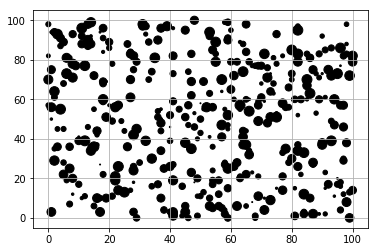

In [5]:
# https://matplotlib.org/users/colormaps.html more about colorschemes and normalization
p.show()

### 4.2 Hubschauberstandorte
Zufällig zugeordnet

In [6]:
aps=[]
for i in range(nOfAP):
    currPoint=randint(0,nOfPoints-1); 
    aps.append([points[currPoint][0],points[currPoint][1]]);
x,y,w,a=zip(*points);
xa,ya=zip(*aps);
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=0.9)

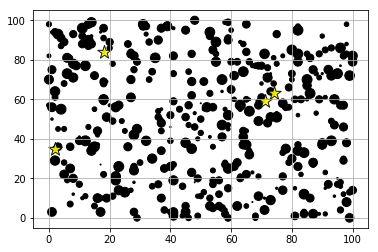

In [7]:
p.show()

### 4.3 Funktionen, die werden gebraucht

In [8]:
# Distance between X and Y
def dist(x,y):
    res=sqrt(pow((x[1]-y[1]),2) + pow((x[0]-y[0]),2))
    rr=float(res)
    return rr;

# Tell the points the closest airport to them:
def PtoA(points,aps):
    # For each point, look to which of the airports its the closes, and assign it to it
    for i in range(len(points)):
    #    print(i, ": Iterating point ", i, " with coords ", points[i][0],points[i][1])
        # max distance = 100
        m=1000;
        for j in range(len(aps)):
    #        print("  ",j,": Iterating airport",j," with coords ", aps[j][0],aps[j][1])
            d=dist(points[i],aps[j]);
    #        print("  Distance between them is ",d)
            if d<m:
    #            print("      current m is:",m);
    #            print("      current d is:",d);
    #            print(">>      d<m");
                m=d;
                # We set the closest airport in the array
                points[i][3]=j;
    return(points);

# Center of mass of points given by array of x,y,w
def cm(x,y,w):
    cmysum,cmxsum=0,0;
    weightsum=sum(w)
    
    for i in range(len(x)):
        cmxsum+=x[i]*w[i]
        cmysum+=y[i]*w[i]
    cmy=cmysum/weightsum;
    cmx=cmxsum/weightsum;
    return(cmx,cmy)

#Which points belong to which airports to separate array
def AtoP(points,aps):
#apoints=[[]]*nOfAP;
    apoints=[]
    for i in range(len(aps)):
        apoints.append([]);

    for i in range(len(points)):
        apoints[points[i][3]].append(points[i]);
    return(apoints);

def calculate_cmasses(apoints):
    cmasses=[];
    for a in apoints:
        if a:
            x,y,w,a=zip(*a);
            cmx,cmy=cm(x,y,w);
            cmasses.append([cmx,cmy]);
    return cmasses

### 4.4 Clusters
Jedes Punkt wird einem Hubschrauberstandort zugeordnet und passend gefärbt:

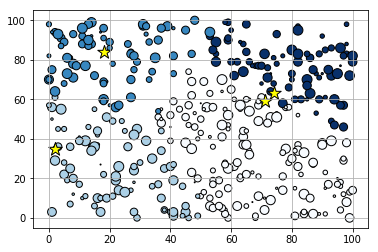

In [9]:
points=PtoA(points,aps);

x,y,w,a=zip(*points);
xa,ya=zip(*aps);
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black',cmap='Blues')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=1)
p.show()

### 4.5 Zentroide
Wir finden die Zentroide von jedes Cluster.

In [10]:
apoints=AtoP(points,aps);
cmasses=calculate_cmasses(apoints);

# Plot all points and all airports
cmx,cmy=zip(*cmasses);
xa,ya=zip(*aps);
x,y,w,a=zip(*points);
norm=colors.Normalize(vmin=0., vmax=float(nOfAP*2));
p.grid();
p.scatter(x,y,w,norm(a),marker='o',linewidth='1',edgecolor='black',cmap='Blues')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=1)
p.scatter(cmx,cmy,c='xkcd:hot pink',marker='H',s=100,linewidth='1',edgecolor='black')

**Hubschrauberstandorte:** Gelbe Sternen
**Zentroide:** Rosa Vielecken

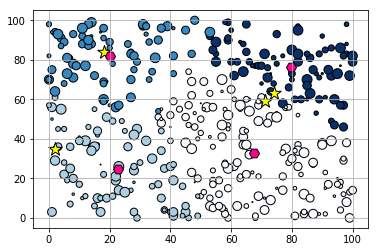

In [11]:
p.show()

### 4.6 Optimierung
Jedes iteration, wir verlegen den Hubschauber in der Zentroide und schätzen die neue Zetroide, bis zum Iteration, wo es  keine Bewegung gibt.

In [12]:
universe=[];
eps=0;
while eps==0:
    # Add the beginning
    universe.append([[x,y,w,a],[cmx,cmy],[xa,ya]]);
    bew=0;
    # Airport in Centroid for all centroids
    for i in range(len(cmasses)):
        if (aps[i][0]!=cmasses[i][0]):
            #print(">",aps[i][0],cmasses[i][0]);
            aps[i][0]=cmasses[i][0];
            bew=1;
        if (aps[i][1]!=cmasses[i][1]):
            aps[i][1]=cmasses[i][1];
            bew=1;
    # If there was no movement, it's over
    if bew==0:
        eps=1;
    # We update to which airport belong the points, based on the new position of the airports
    points=PtoA(points,aps);
    apoints=AtoP(points,aps);
    cmasses=calculate_cmasses(apoints);
    
    cmx,cmy=zip(*cmasses);
    x,y,w,a=zip(*points);
    xa,ya=zip(*aps)

### 4.7 Resultaten

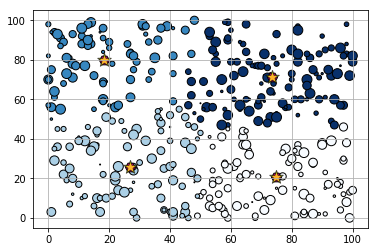

In [13]:
# Plot all points and all airports
cmx,cmy=zip(*cmasses);
x,y,w,a=zip(*points);
xa,ya=zip(*aps);

norm=colors.Normalize(vmin=0., vmax=float(nOfAP*2));

p.grid();
p.scatter(x,y,w,norm(a),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
p.scatter(cmx,cmy,c='xkcd:hot pink',marker='H',s=100,linewidth='1',edgecolor='black')
p.scatter(xa,ya,c='yellow',marker='*',s=200,linewidth='1',edgecolor='black',alpha=0.7)
p.show()
#universe

### 4.8 Visualisation der Schritte

Out of 8 , we're at 0

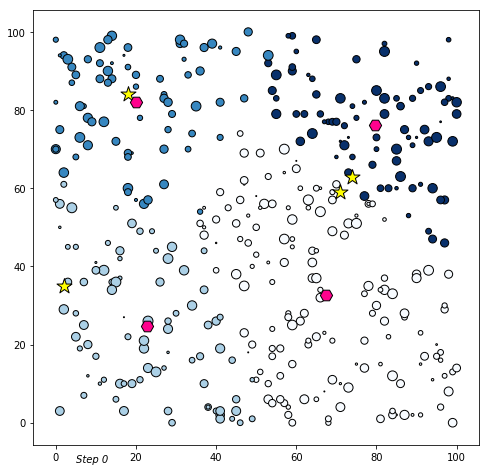

Out of 8 , we're at 0Out of 8 , we're at 0Out of 8 , we're at 1Out of 8 , we're at 2Out of 8 , we're at 3Out of 8 , we're at 4Out of 8 , we're at 5Out of 8 , we're at 6Out of 8 , we're at 7

In [14]:
import numpy as np;
import matplotlib.pyplot as plt;
from matplotlib.animation import FuncAnimation
from matplotlib import rc

fig = plt.figure(figsize=(8,8))
ax = plt.axes(xlim=(20,80),ylim=(20,80))

def update(i):
    global universe;
    ax.clear()
    scatter=ax.scatter(universe[i][0][0],universe[i][0][1],universe[i][0][2],norm(universe[i][0][3]),marker='o',cmap='Blues',linewidth='1',edgecolor='black')
    scatter=ax.scatter(universe[i][2][0],universe[i][2][1],c='yellow',marker='*',s=250,linewidth='1',edgecolor='black')
    scatter=ax.scatter(universe[i][1][0],universe[i][1][1],c='xkcd:hot pink',marker='H',s=150,linewidth='1',edgecolor='black')
    scatter=ax.text(5, -10, 'Step '+str(i), style='italic')
    print("Out of",len(universe),", we're at ",end='')
    print(i,end='');
    return scatter;

anim = FuncAnimation(fig, update, interval=500,frames=len(universe))
plt.show() 
from IPython.display import HTML,Image
rc('animation', html='html5')

anim

In [15]:
anim